# Initially, run "Mount Google drive" once and put the "ObesityDataSet_raw_and_data_sinthetic.csv" into the newly created folder "Colab Notebooks" which is directly under the root of your Google drive

## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
from pathlib import Path
Path("/gdrive/MyDrive/Colab Notebooks/").mkdir(parents=True, exist_ok=True)
%ls /gdrive/MyDrive/Colab\ Notebooks/

Mounted at /gdrive
/gdrive
 all_processed_train_X.csv                   obesity_train.csv
 all_processed_train_y.csv                   obesity_train_X.csv
 Classification.ipynb                        obesity_train_y.csv
 correlation_heatmap.png                     outlier/
 distribution/                               outlier_flagging.png
 evaluation/                                 Preprocessing_all.ipynb
 low_variance_features.png                   processed_train_X.csv
 models/                                     processed_train_y.csv
 ObesityDataSet_raw_and_data_sinthetic.csv   RamdonForest.ipynb
 obesity_test.csv                            summary/
 obesity_test_X.csv                          target_balance.png
 obesity_test_y.csv                          Term_Project_Preprocessing.ipynb
'obesity_test_y.csv 的副本'


## Load the original file

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/ObesityDataSet_raw_and_data_sinthetic.csv')
dataset['FCVC'] = np.floor(dataset['FCVC']).astype('Int64')
dataset['NCP'] = np.floor(dataset['NCP']).astype('Int64')
dataset['CH2O'] = np.floor(dataset['CH2O']).astype('Int64')
dataset['FAF'] = np.floor(dataset['FAF']).astype('Int64')
dataset['TUE'] = np.floor(dataset['TUE']).astype('Int64')
dataset['Age'] = np.floor(dataset['Age']).astype('Int64')
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## Show the number of columns and records

In [ ]:
dataset.shape

(2111, 17)

## Split training and testing datasets with ratio of 80/20

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(dataset,shuffle=True, test_size=0.2, random_state=42) # 80% training and 20% testing
test_data.head()
# Save the training and testing sets to new CSV files
train_data.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train.csv', index=False)
test_data.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test.csv', index=False)

## Setup training data

In [5]:
# Load the training dataset
train_data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train.csv')

# Separate features (X) and target variable (y)
obesity_train_X = train_data.drop('NObeyesdad', axis=1)
obesity_train_y = train_data['NObeyesdad']

# Save the features and target variable to new CSV files
obesity_train_X.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_X.csv', index=False)
obesity_train_y.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_y.csv', index=False)

## Handle testing data

In [6]:
# Load the test dataset
test_data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test.csv')

# Drop NObeyesdad feature

obesity_test_X = test_data.drop('NObeyesdad', axis=1)
obesity_test_y = test_data['NObeyesdad']
# Save the features and target variable to new CSV files
obesity_test_X.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_X.csv', index=False)
obesity_test_y.to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_y.csv', index=False)

## Check up missing values

In [7]:
# Load the features and target variable for the training dataset
obesity_train_X = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_X.csv')

# Check the missing values for train_X
train_X_missing_values = obesity_train_X.isnull().sum()
# Filter to only columns with missing values and print those
columns_with_missing = train_X_missing_values[train_X_missing_values > 0]
# Iterate over the columns with missing values
for col, missing_count in columns_with_missing.items():
    print(col, missing_count)
print("Columns with missing values:", len(columns_with_missing))
print("Columns without missing values:", len(train_X_missing_values) - len(columns_with_missing))

Columns with missing values: 0
Columns without missing values: 16


In [8]:
obesity_train_y = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_train_y.csv')
# Check the missing values for train_y
train_y_missing_values = obesity_train_y.isnull().sum()
print(train_y_missing_values)

NObeyesdad    0
dtype: int64


## Identify categorical columns

In [9]:
# Identify categorical columns
categorical_columns = obesity_train_X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


## Identitfy initial essential columns based on domain knowledge and context

1.   Age - Obesity risk factors vary across age groups.
2.   Gender - Biological differences may influence obesity levels.
3.   family_history_with_overweight - Genetic predisposition to obesity is a relevant factor.
4.   FAVC (Frequent consumption of high-caloric food) - Diet choices impact obesity risk.
5.   FCVC (Frequency of vegetable consumption) - Healthy eating habits are inversely related to obesity.
6.   NCP (Number of main meals per day) - Eating frequency affects weight and metabolic health.
7.   CAEC (Consumption of food between meals) - Snacking habits may contribute to weight gain.
8.   CH2O (Water consumption) - Proper hydration can aid in weight management.
9.   FAF (Physical activity frequency) - Physical activity is crucial in maintaining a healthy weight.
10.  TUE (Time spent on technology) - Sedentary lifestyle choices are associated with obesity.
11.  CALC (Alcohol consumption frequency) - Alcoholic beverages can add significant calories to the diet.







In [10]:
# Initial essential columns based domain knowledge and context
initial_essential_columns = [
    'Age', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
    'CAEC', 'CH2O', 'FAF', 'TUE',
    'CALC'
]
print("Manual select:", initial_essential_columns)
print("Total:", len(initial_essential_columns))

Manual select: ['Age', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
Total: 11


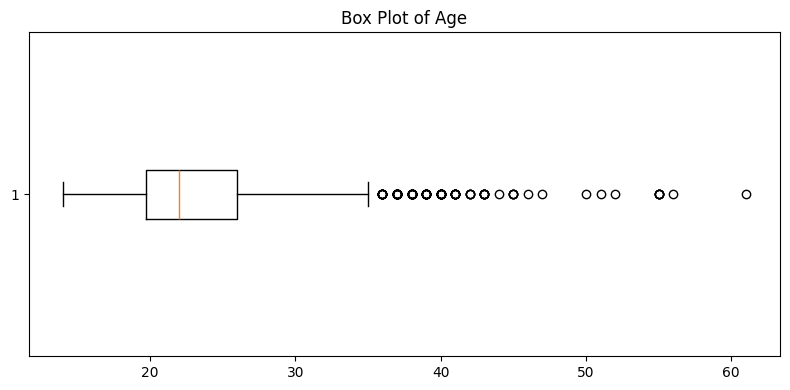

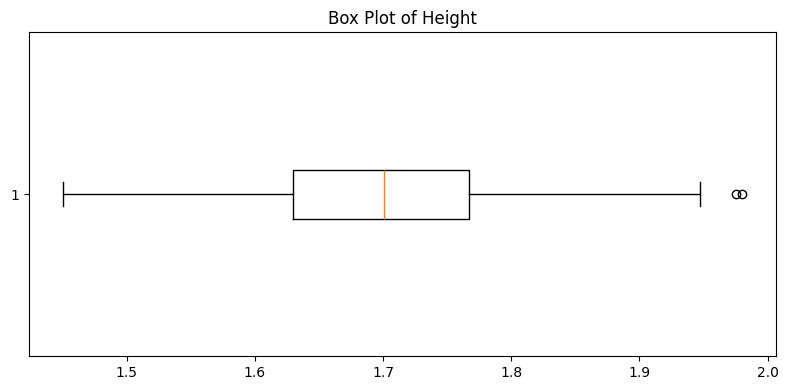

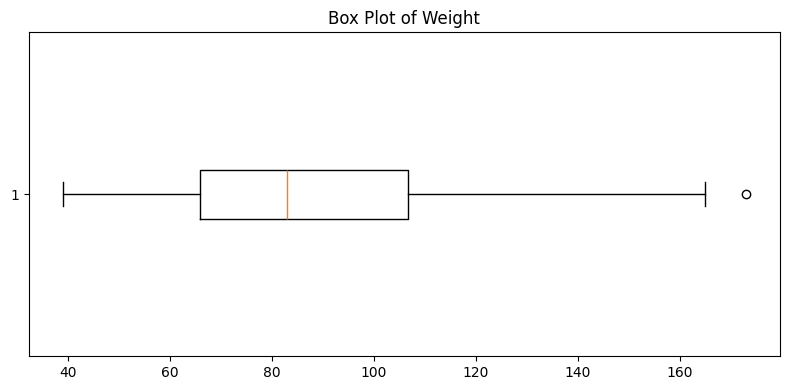

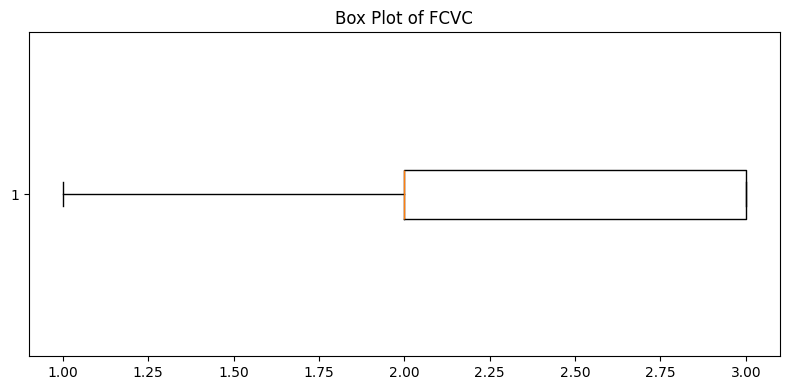

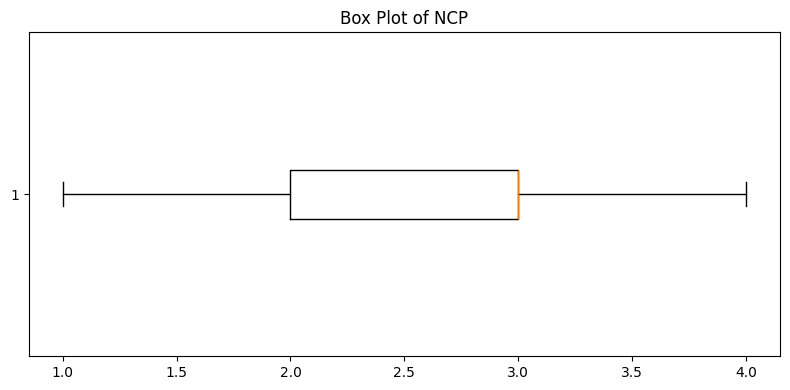

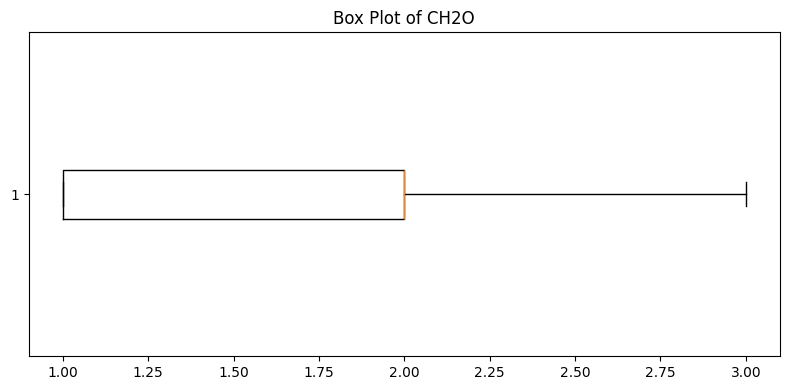

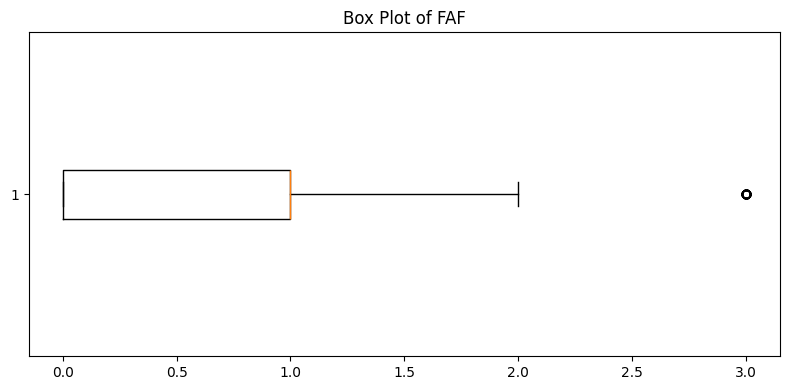

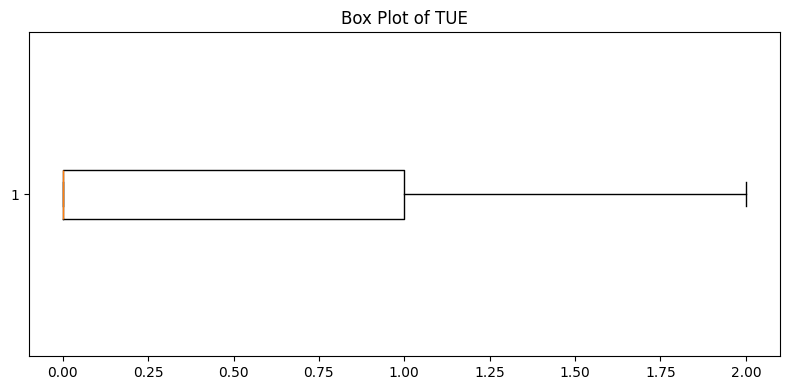

Non-essential Columns After Variance Analysis: ['Height']


In [13]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
# Variance Analysis (Removing low variance columns)
def get_low_variance_features(df, threshold=0.01):
    numerical_data = df.select_dtypes(include=['float64', 'int64']).dropna()

    # Plotting box plots for each numerical column
    numerical_data_for_drawing = numerical_data.loc[:, ~numerical_data.columns.str.endswith('_id')]
    for column in numerical_data_for_drawing.columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(numerical_data_for_drawing[column], vert=False)
        plt.title(f"Box Plot of {column}")
        plt.tight_layout()
        plt.show()
        plt.close()  # Close the plot to avoid overlap issues

    var_thresh = VarianceThreshold(threshold=threshold)
    var_thresh.fit(numerical_data)
     # Get low-variance columns
    low_variance_columns = numerical_data.columns[~var_thresh.get_support()]

    return low_variance_columns.tolist()
non_essential_columns =[]
non_essential_columns = get_low_variance_features(obesity_train_X)
print("Non-essential Columns After Variance Analysis:", non_essential_columns)

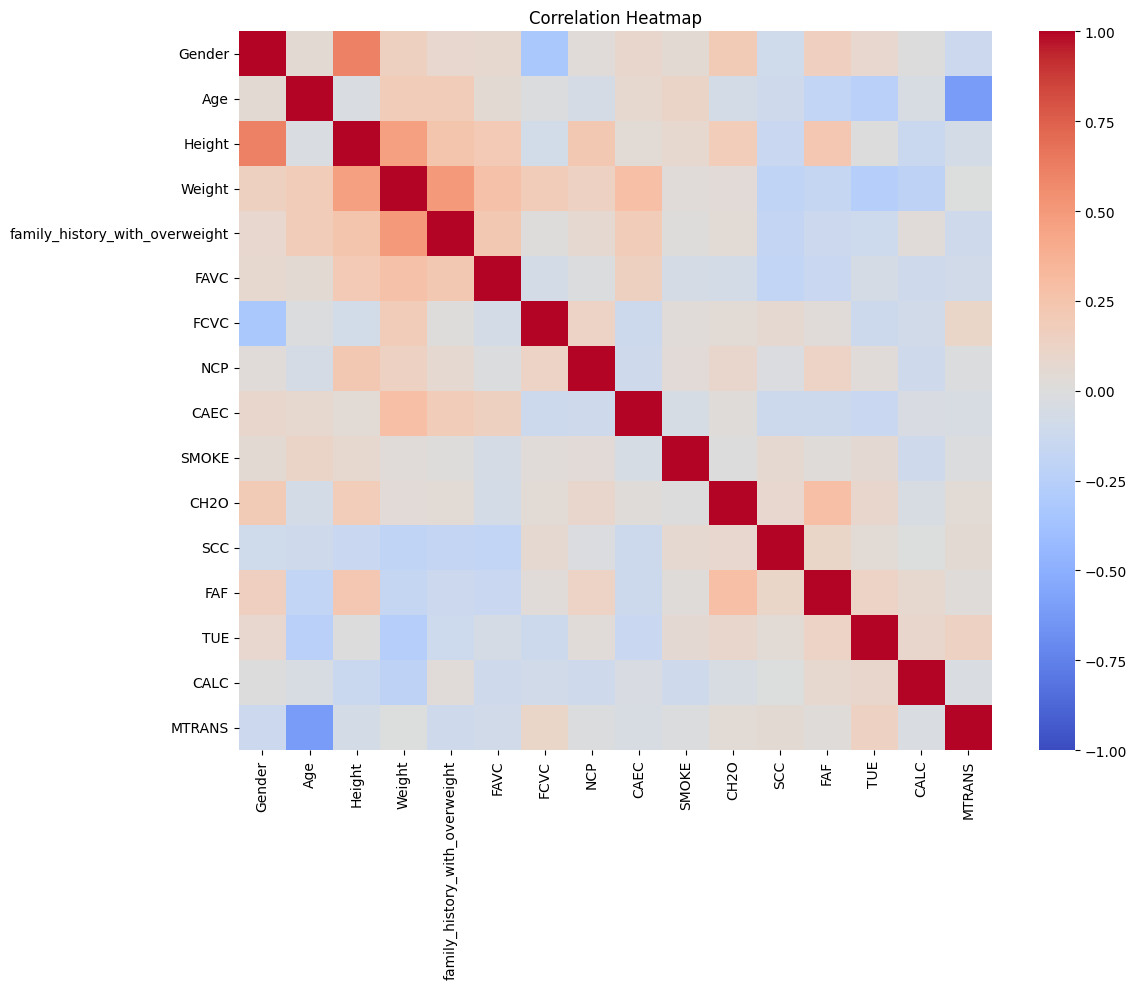

Redundant Columns Due to High Correlation: []
Non-essential Columns After Correlation Analysis: ['Height']


In [ ]:
import numpy as np
import seaborn as sns
# Correlation and Redundancy Check
def find_redundant_columns(df, threshold=0.9):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Plotting correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/correlation_heatmap.png")
    plt.show()

    # Calculate the correlation matrix
    # Taking the absolute values, as we are interested in the strength of the correlation
    corr_matrix = numeric_df.corr().abs()
    # Create the upper triangle mask of the correlation matrix
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    # Identify columns with high correlation
    redundant_columns = [
        column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
    ]
    essential_columns = df.columns.difference(redundant_columns)
    return redundant_columns

redundant_columns = find_redundant_columns(obesity_train_X)
print("Redundant Columns Due to High Correlation:", redundant_columns)
non_essential_columns.extend(redundant_columns)
print("Non-essential Columns After Correlation Analysis:", non_essential_columns)

In [ ]:
# Separate numerical and categorical columns
numerical_cols = obesity_train_X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = obesity_train_X.select_dtypes(include=['object']).columns

## Get Skewness value of each column

In [ ]:
# Use Skewness to measure asymmetry in a data distribution
skewness = obesity_train_X[numerical_cols].skew()
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
Age       1.580972
Height    0.014817
Weight    0.254591
FCVC     -0.139007
NCP      -0.885731
CH2O      0.231770
FAF       0.881512
TUE       1.304721
dtype: float64


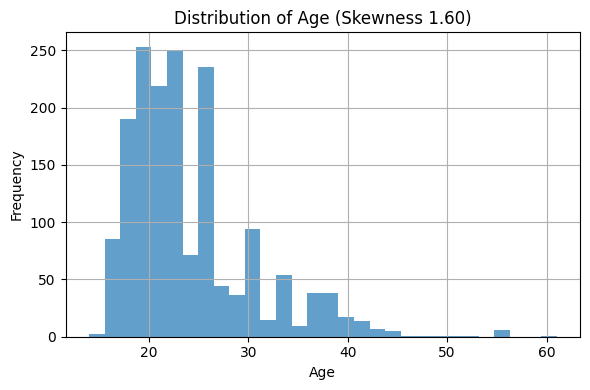

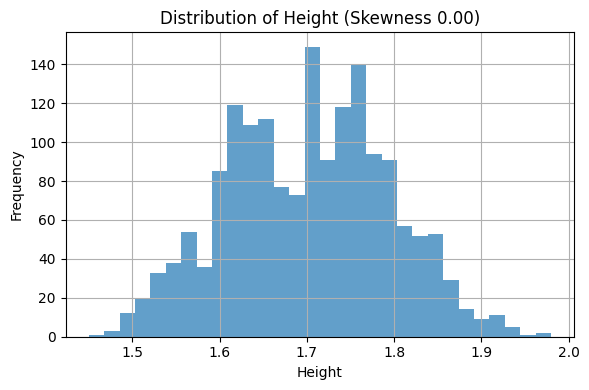

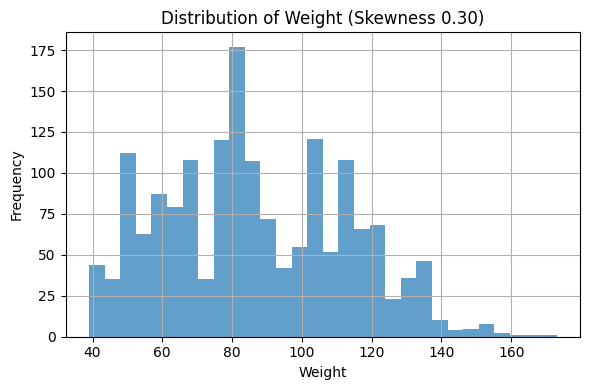

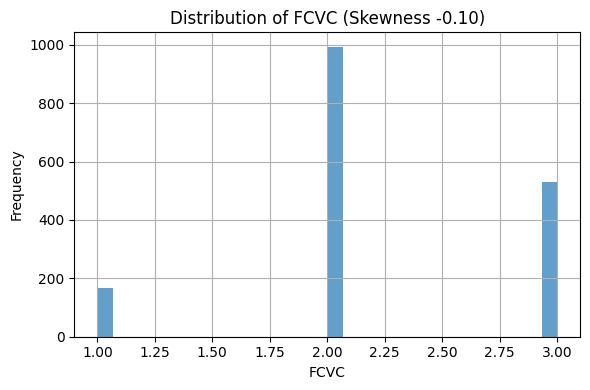

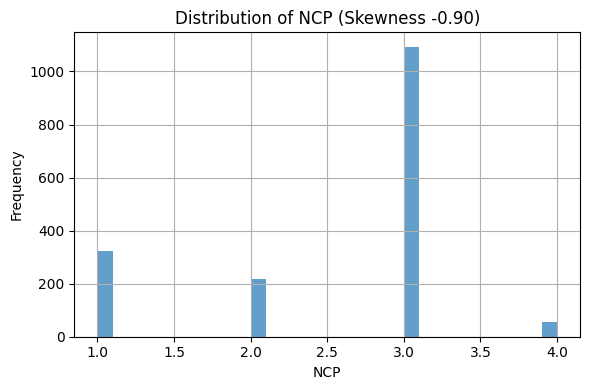

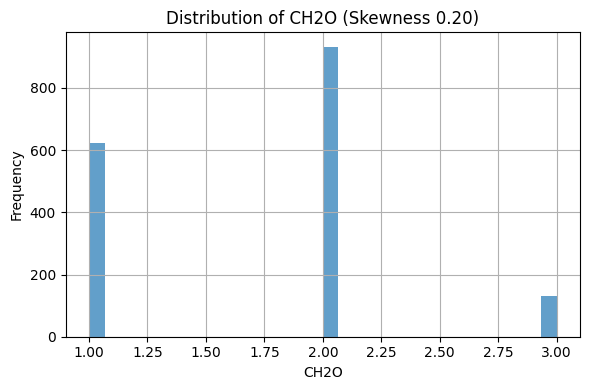

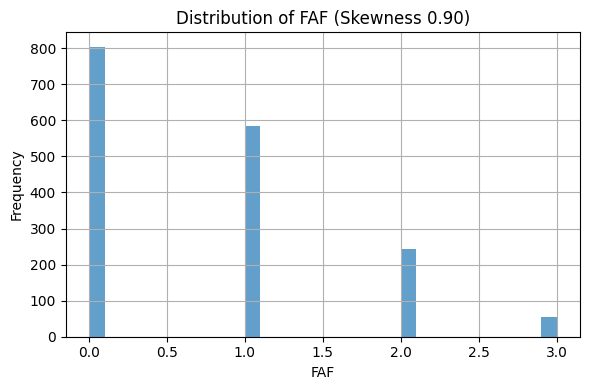

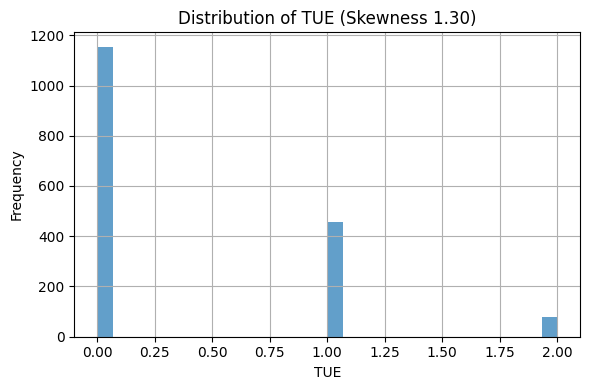

In [ ]:
Path("/gdrive/MyDrive/Colab Notebooks/distribution/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/symmetric/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/right-skew/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/distribution/left-skew/").mkdir(parents=True, exist_ok=True)
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram for each numerical column
for col in numerical_cols:
    # Plotting histogram before imputation
    plt.figure(figsize=(6, 4))
    obesity_train_X[col].dropna().hist(bins=30, alpha=0.7)
    plt.title(f"Distribution of {col} (Skewness {round(skewness[col],1):.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    if abs(skewness[col]) < 0.5:
        plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/symmetric/{col}_distribution.png")
    else:
        if skewness[col] > 0.5:
            plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/right-skew/{col}_distribution.png")
        elif skewness[col] < -0.5:
            plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/distribution/left-skew/{col}_distribution.png")
    plt.show()
    plt.close()

## Apply encoding based on non-ordinal or ordinal categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Before encode DataFrame:")
print(obesity_train_X.shape)
# Apply encoding based on non-ordinal or ordinal classification
for col in categorical_cols:
    # Apply LabelEncoder
    label_encoder = LabelEncoder()
    obesity_train_X[col] = label_encoder.fit_transform(obesity_train_X[col])

# Final check to see the transformed DataFrame
print("Encoded DataFrame:")
print(obesity_train_X.head())
# Display the shape of the dataset
print(obesity_train_X.shape)

Before encode DataFrame:
(1688, 16)
Encoded DataFrame:
   Gender  Age    Height      Weight  family_history_with_overweight  FAVC  \
0       0   21  1.630000   60.000000                               1     1   
1       0   20  1.752531  133.618706                               1     1   
2       0   22  1.661715   82.595793                               1     1   
3       0   21  1.588046   44.236067                               0     0   
4       1   25  1.811602  106.042142                               1     1   

   FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0     3    3     0      1     2    0    2    0     2       3  
1     3    3     2      0     2    0    1    0     2       3  
2     1    1     2      0     2    0    0    1     2       3  
3     3    1     1      0     2    0    1    0     3       3  
4     3    3     2      0     2    0    1    0     2       3  
(1688, 16)


## Target blance analysis
### The data is well-balanced—no need to do any further imbalanced handle.




Target Balance: NObeyesdad
Obesity_Type_I         0.161730
Obesity_Type_III       0.154621
Overweight_Level_II    0.142180
Obesity_Type_II        0.141588
Overweight_Level_I     0.138626
Normal_Weight          0.133294
Insufficient_Weight    0.127962
Name: proportion, dtype: float64


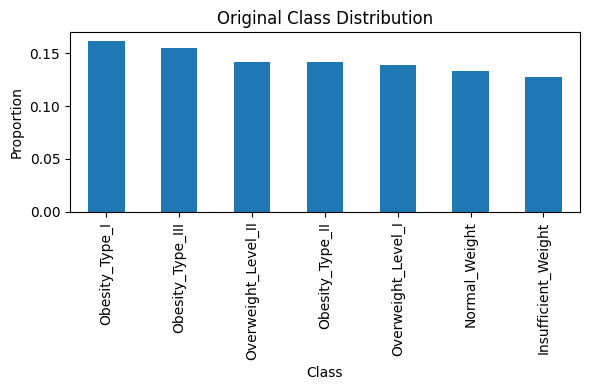

In [ ]:
# Check the balance of the target variable 'has_died' in train_y
target_balance = obesity_train_y['NObeyesdad'].value_counts(normalize=True)
# Display the target balance
print("Target Balance:", target_balance)

# Plot original class distribution
plt.figure(figsize=(6, 4))
target_balance.plot(kind='bar')
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/target_balance.png")
plt.show()

## Statistics after data preprocessing

In [ ]:
# Generate Summary Statistics
numerical_columns = obesity_train_X.select_dtypes(include=['float64', 'int64']).columns
# Summary statistics for numerical columns
print("Summary Statistics:")
print(obesity_train_X[numerical_columns].describe())
# Display the shape of the dataset
print(obesity_train_X.shape)
print(obesity_train_y.shape)

Summary Statistics:
            Gender          Age       Height       Weight  \
count  1688.000000  1688.000000  1688.000000  1688.000000   
mean      0.506517    24.104265     1.701613    86.598197   
std       0.500106     6.438052     0.093270    26.099410   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.750000     1.629932    66.000000   
50%       1.000000    22.000000     1.700747    82.977398   
75%       1.000000    26.000000     1.767371   106.736879   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     1688.000000  1688.000000  1688.000000  1688.000000   
mean                         0.819313     0.888033     2.215047     2.523104   
std                          0.384873     0.315419     0.604732     0.835312   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1

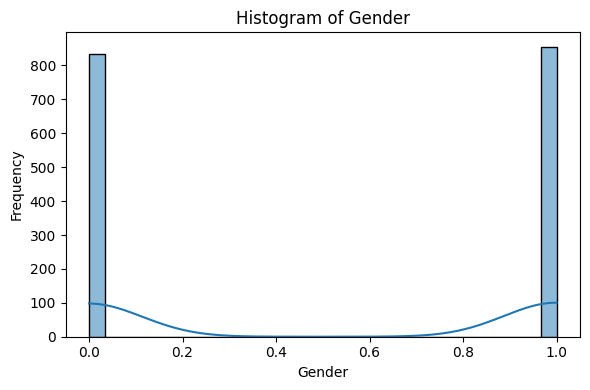

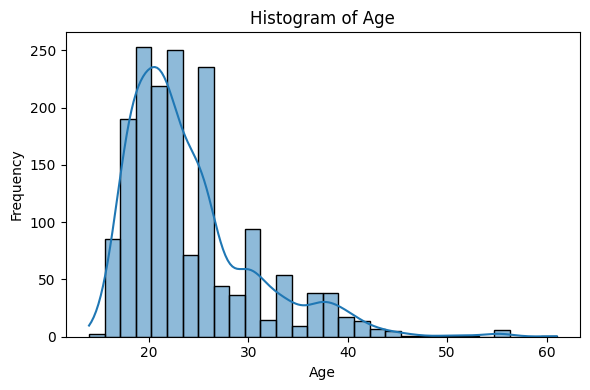

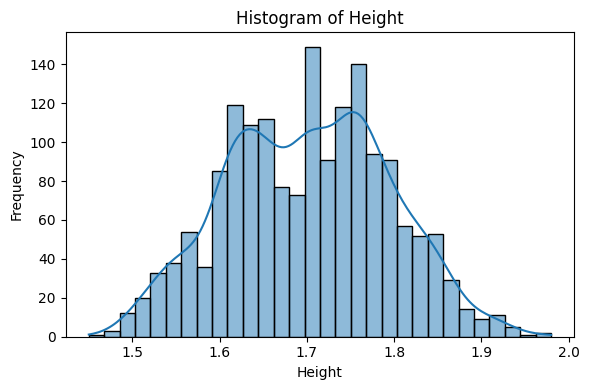

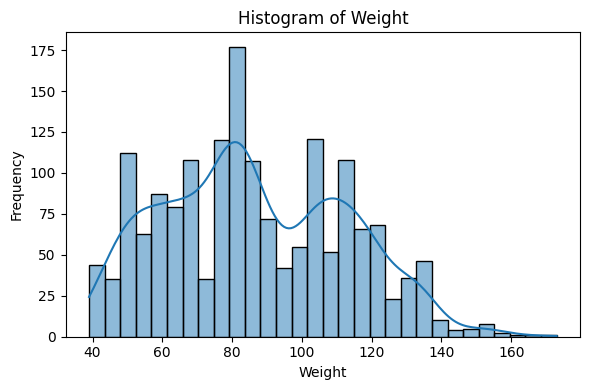

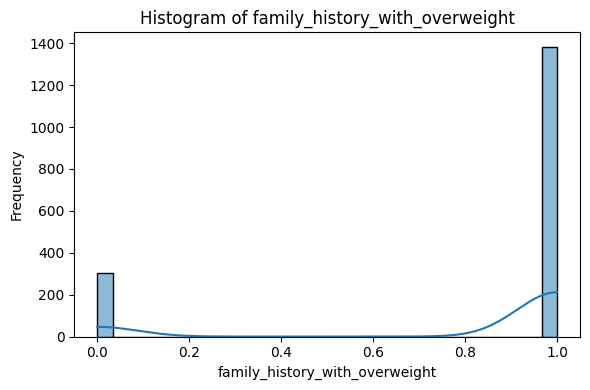

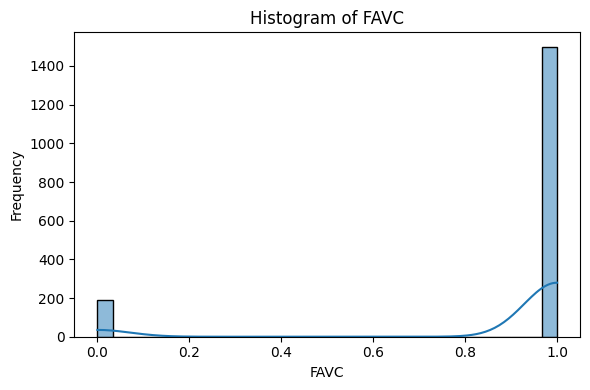

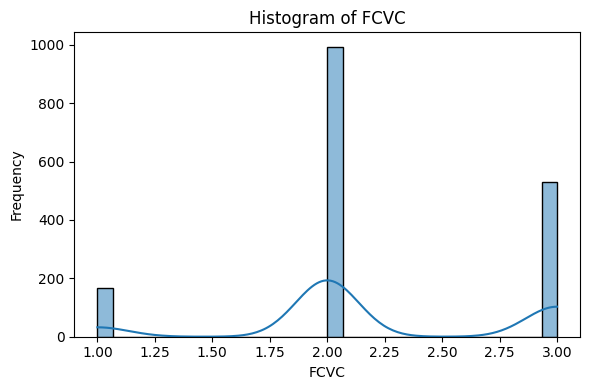

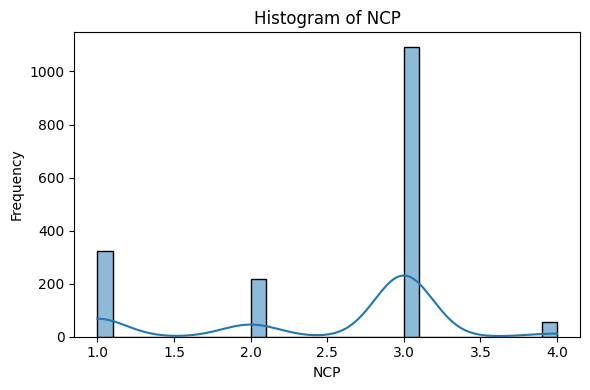

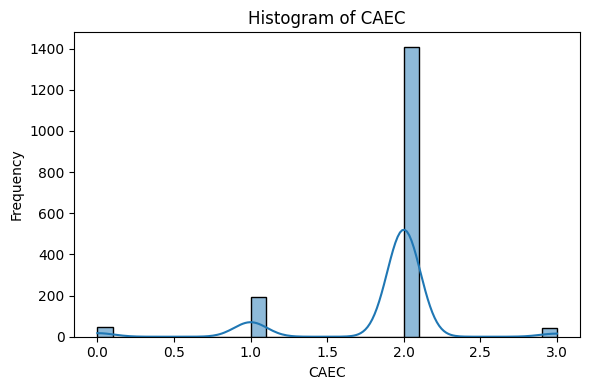

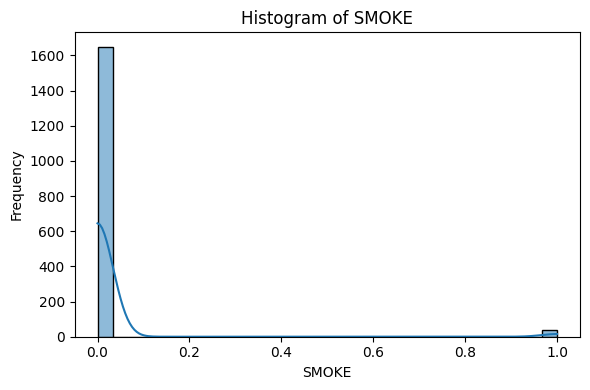

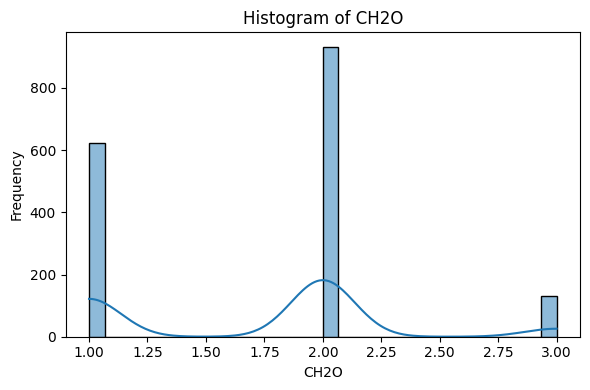

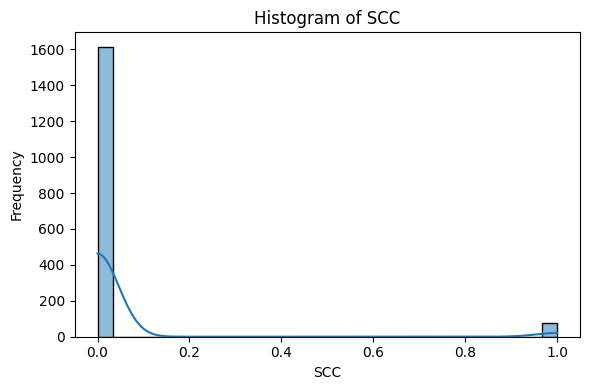

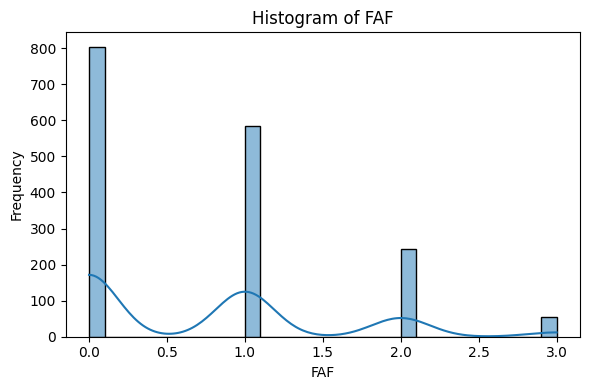

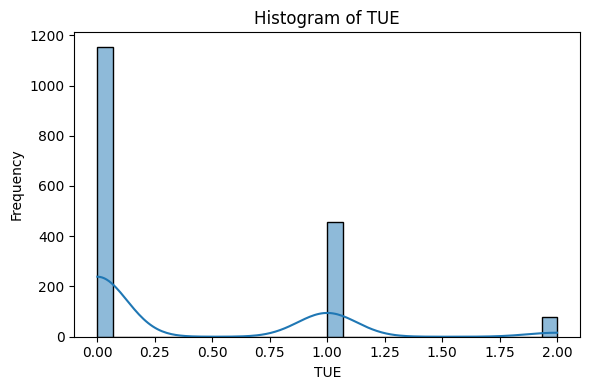

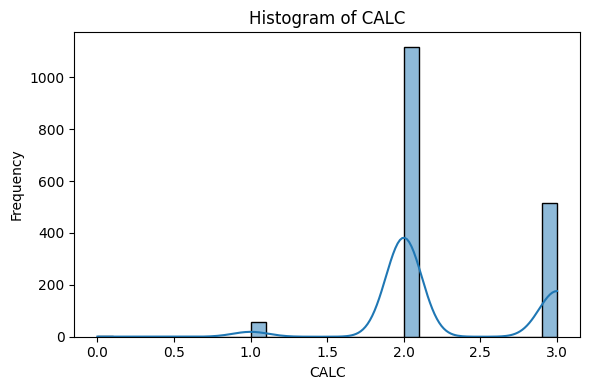

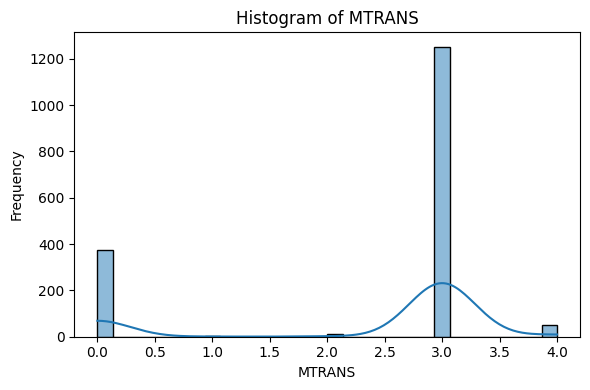

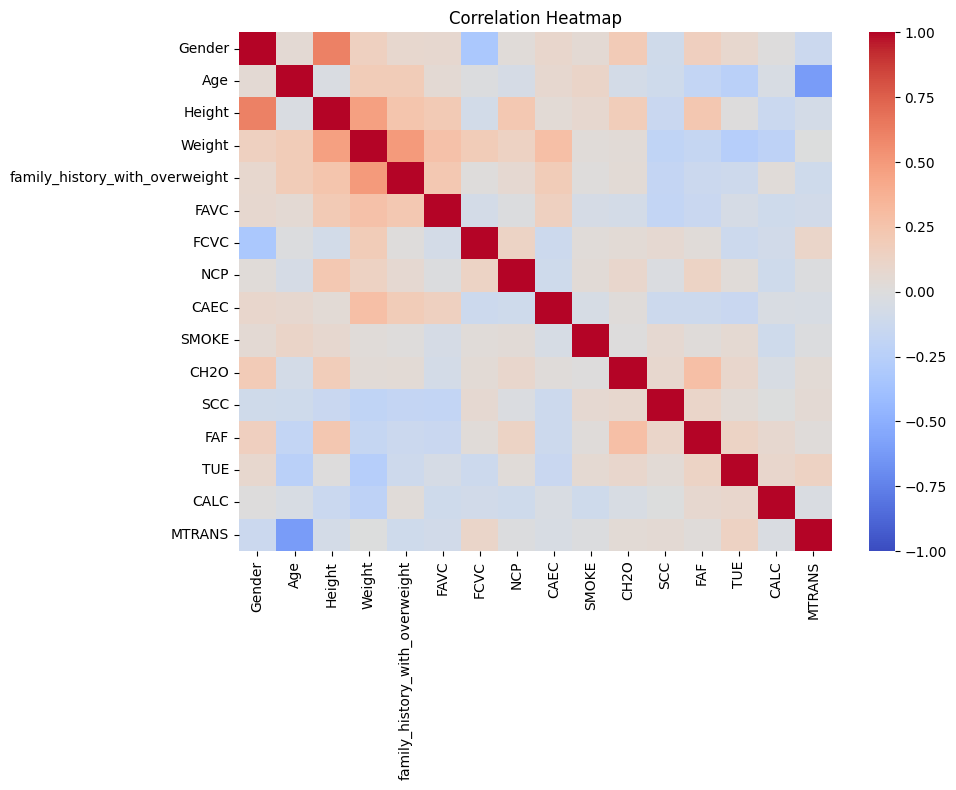

In [ ]:
Path("/gdrive/MyDrive/Colab Notebooks/summary/").mkdir(parents=True, exist_ok=True)
Path("/gdrive/MyDrive/Colab Notebooks/summary/histograms/").mkdir(parents=True, exist_ok=True)
# 1. Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(obesity_train_X[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"/gdrive/MyDrive/Colab Notebooks/summary/histograms/{col}_histogram.png")
    plt.show()
    plt.close()
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = obesity_train_X[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Colab Notebooks/summary/correlation_heatmap.png")
plt.show()

## Save processed files

In [ ]:
# Save the processed dataset to a CSV file
obesity_train_X.to_csv("/gdrive/MyDrive/Colab Notebooks/all_processed_train_X.csv", index=False)
obesity_train_y.to_csv("/gdrive/MyDrive/Colab Notebooks/all_processed_train_y.csv", index=False)
print("The processed dataset has saved.")
print("Non-essential columns:", non_essential_columns)

The processed dataset has saved.
Non-essential columns: ['Height']
